In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

In [2]:
# Example dataset - 32k names
words = open('/home/martina/Desktop/Git/makemore/names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

## Bigram - only pairs, predict next char based on previous

In [7]:
for w in words[:1]:
    # the zipped iterator prints the pairs of chars
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


In [8]:
for w in words[:3]:
    # create a start and end tokens and add the name (char-level) between
    chars = ['<S>'] + list(w) + ['<E>']
    # now iterate over this list
    #bigrams
    for ch1, ch2 in zip(chars, chars[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


The simplest way to get a probability of which character is likely to come next is by counting them.

In [9]:
# Create a dictionary which will hold the counts
b = {}
for w in words[:3]:
    chars = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        # returns a 0 if the bigram is not in dict
        b[bigram] = b.get(bigram, 0) + 1
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [10]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [11]:
# Now do it for all words
b = {}
for w in words:
    chars = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [12]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [13]:
# Get the most common bigrams
# Convert dict to touples - the bigram is the first, the count is the second
# Then sort but default is by first val and we want to sort by count - so lambda to use that as a key
# And the minus changes order to descending
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [14]:
# More convenient to store in a 2D array
# Rows being the first char, columns the second

In [15]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [16]:
a.dtype #default was float32

torch.int32

In [17]:
a[1, 3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [18]:
a[1, 3] += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [19]:
# Our array will be much bigger
# 26 letters + 2 special chars = 28 by 28 array
N = torch.zeros((28, 28), dtype=torch.int32)

In [20]:
# Since now using an array, we can index using strings
# We need integers and some lookup table to conver to int

In [21]:
# sets don't allow duplicates 
# so it will through out any
set(''.join(words))

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [22]:
len(set(''.join(words)))

26

In [23]:
# Now use that to create the mapping table
# And add the tokens
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [24]:
for w in words:
    chars = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chars, chars[1:]):
        # Map chars to integers
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # Find this pair's place in the array
        N[ix1, ix2] += 1 # since the array is all 0 to start with

In [25]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

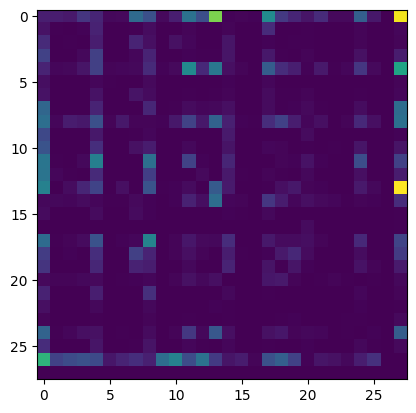

In [26]:
plt.imshow(N)
plt.show()

In [27]:
# First thing is we need to be able to invert the dict
# From integer back to string
itos ={i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

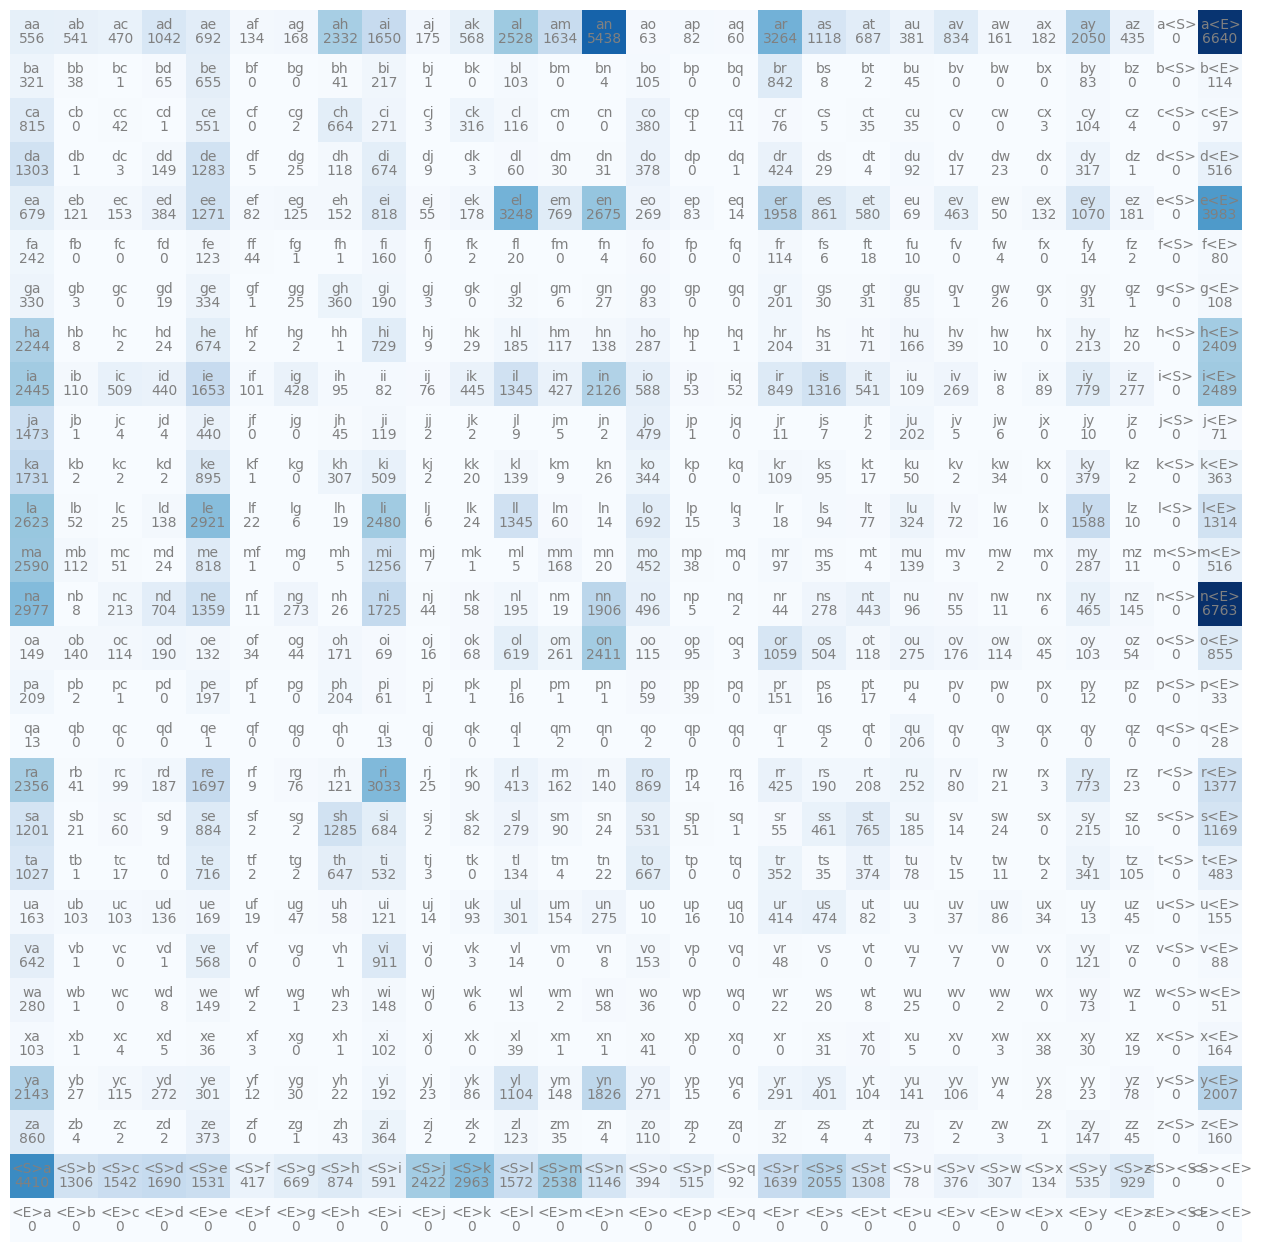

In [28]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        char_str = itos[i] + itos[j]
        plt.text(j, i, char_str, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')
plt.show()

In [29]:
# We have an entire row and column of 0s
# Since the <E> char is never going to be the first in a pair
# And the <S> char is never going to be the last in a pair


In [30]:
# Switch to 1 special token
N = torch.zeros((27, 27), dtype=torch.int32)

In [31]:
chars = sorted(list(set(''.join(words))))
# one special char and move it to 0 index
# so offset the others with 1
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos ={i:s for s,i in stoi.items()}

In [32]:
for w in words:
    chars = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chars, chars[1:]):
        # Map chars to integers
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # Find this pair's place in the array
        N[ix1, ix2] += 1 # since the array is all 0 to start with

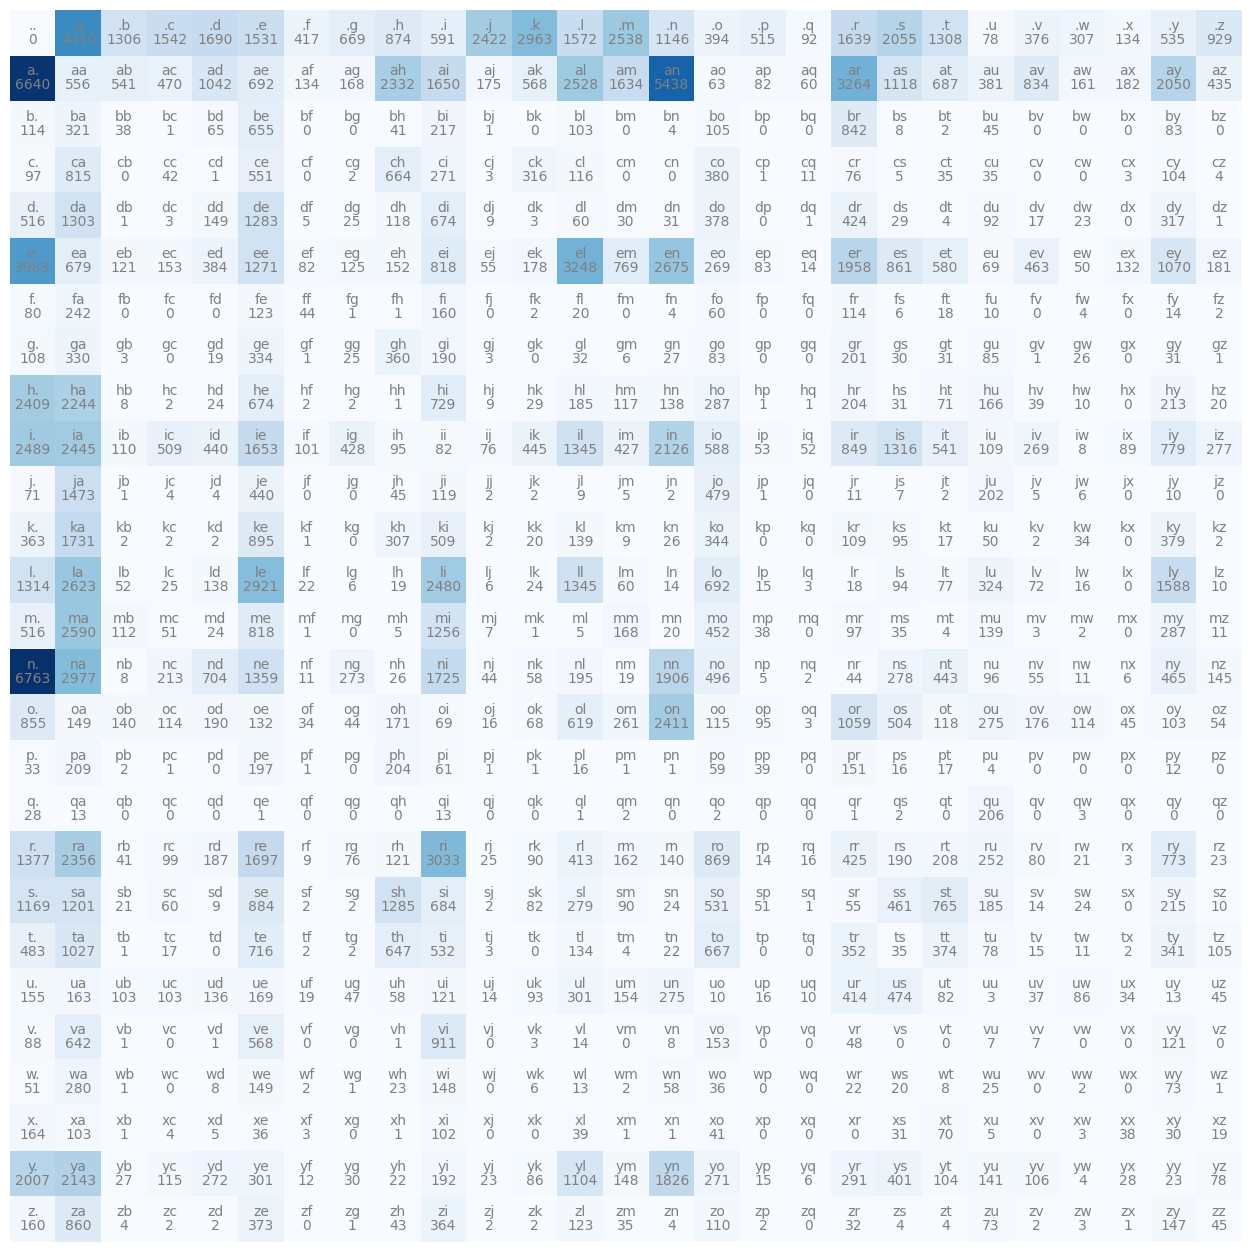

In [33]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        char_str = itos[i] + itos[j]
        plt.text(j, i, char_str, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')
plt.show()

In [34]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [35]:
N[0, :].shape

torch.Size([27])

In [36]:
# equivalent - shorter
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [37]:
# Create probabilities
p = N[0].float()
# Normalize
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [38]:
# Use a generator so that it's deterministic (reproducible)
g = torch.Generator().manual_seed(2147483647)
# This created 3 random numbers
p = torch.rand(3, generator=g)
print(p)
p = p / p.sum()
print(p)

tensor([0.7081, 0.3542, 0.1054])
tensor([0.6064, 0.3033, 0.0903])


In [39]:
# Draw samples from this - given probability, returns a number
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

we expect roughly 60% to be the first number, 30% the second, and only 10% - the third
seems to be 
60% 0
30% 1
10% 2

In [40]:
# Now sample from our data
g = torch.Generator().manual_seed(2147483647)
p = N[0].float()
p = p / p.sum()

ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

To sample the second character, we go to the row that starts with 'j'
We can now do this as a loop

In [44]:
g = torch.Generator().manual_seed(2147483647)

out = []
ix = 0
while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    # in this case, we're at the row of the end token
    # since that was indexed at 0
    if ix == 0:
        break
print(''.join(out))

junide.


In [45]:
# Sampple 10 names
for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        # in this case, we're at the row of the end token
        # since that was indexed at 0
        if ix == 0:
            break
    print(''.join(out))

janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.


Bigram is not doing a really good job.
But to show it's not doing a terrible job compare to a uniform distribution

In [46]:
# Sampple 10 names
for i in range(10):
    out = []
    ix = 0
    while True:
        #p = N[ix].float()
        #p = p / p.sum()
        p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        # in this case, we're at the row of the end token
        # since that was indexed at 0
        if ix == 0:
            break
    print(''.join(out))

snjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.
f.
.


Fix an inefficiency - in every loop we're calculating probability over and over again.
Prepare a matrix which has this ready

In [47]:
# creates a copy
P = N.float()

In [48]:
# can't do that - this sums the whole matrix
P.sum()

tensor(228146.)

In [49]:
# Taking the 0th dimension and summing across it
# Keepdim
P.sum(0, keepdim=True).shape

torch.Size([1, 27])

In [50]:
P.sum(0, keepdim=False).shape

torch.Size([27])

In [51]:
# We actually want to sum across the other dimension
# Want to get a column vector
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

We now want
P = P / P.sum(1, keepdim=True)

We have an array
27, 27
and want to divide by
27, 1

If we can do that - broadcasting rules
can search for broadcasting semantics in torch

Rules require either same, one of the dims is 1 or does not exist

In our case, the arrays are broadcastable

In [ ]:
P = P / P.sum(1, keepdim=True)

In [ ]:
# Sampple 10 names
for i in range(10):
    out = []
    ix = 0
    while True:
        #p = N[ix].float()
        #p = p / p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        # in this case, we're at the row of the end token
        # since that was indexed at 0
        if ix == 0:
            break
    print(''.join(out))